## Digital Image Processing
### Assignment 1

**Question 1**

1 Byte = 1 pixel  
5.76 MB = 5760000 pixels  
Height = 3x  
Width = 4x  
Total = 36x^2  
36 * x * x = 5760000  
x = root(5760000/36)  
x = 400 
Height = 3 * 400 = 1200 pixels  
Width = 4 * 400 = 1600 pixels  


**Question 2**  
Total pixels = 5200 * 5200 * 2000 = 54080000000

a) Black and White  
54080000000 bits / (64000000000 * 8)  
(54080000000 / 512000000000)  
0.105625

b) Gray Scale  
54080000000 * 8 bits / (64000000000 * 8)  
0.845  

c) Colored Scale  
54080000000 * 8 * 3 bits / (64000000000 * 8)  
2.535

**Question 3**   
Basically per pixel area increased.

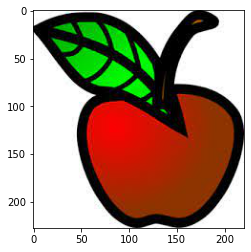

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../imgs/index.jpeg')
imgplot = plt.imshow(img)
plt.show()

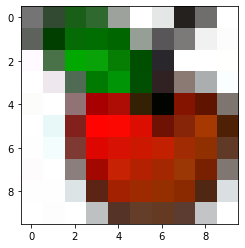

In [2]:
from PIL import Image

img = Image.open('../imgs/index.jpeg')
img.thumbnail((10, 10), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)

## Question 2

In [3]:
import cv2 as cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [4]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

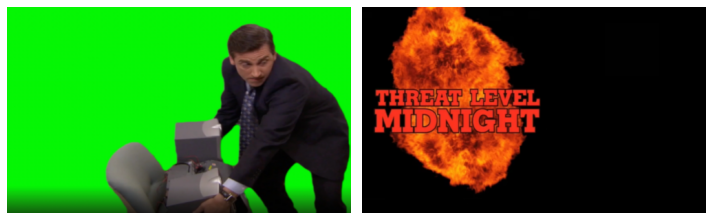

In [5]:
img = cv.imread("../imgs/foreground.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("../imgs/background.png")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 300)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

show_img_compar(img, img_2)

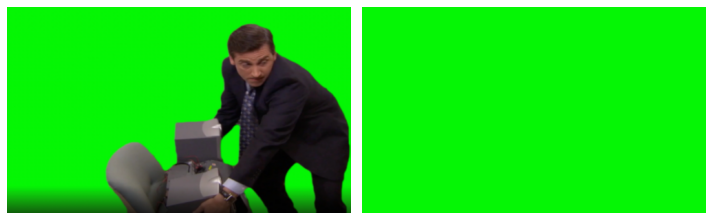

In [6]:
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

show_img_compar(img, img_temp)

In [7]:
demn = img_temp[0][0]

In [8]:
std = 1.3 * np.std(img[1].flatten())
# plt.imshow(img)
std = int(std)
std

147

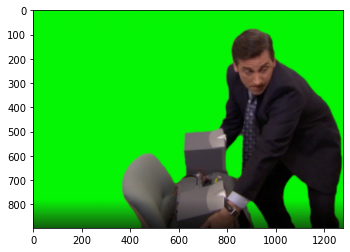

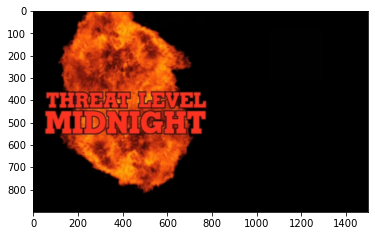

In [9]:
frame1 = cv.imread("../imgs/foreground.png")
frame1 = cv.cvtColor(frame1, cv.COLOR_BGR2RGB)
frame2 = cv.imread("../imgs/background.png")
frame2 = cv.cvtColor(frame2, cv.COLOR_BGR2RGB)
plt.imshow(frame1)
plt.show()
plt.imshow(frame2)
plt.show()

In [10]:
std

147

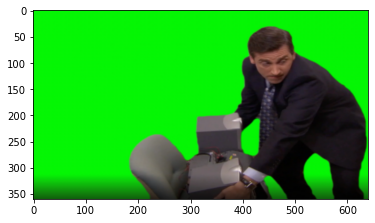

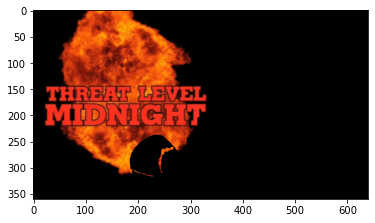

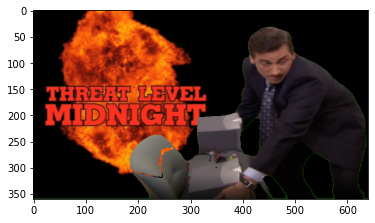

In [11]:
frame1 = cv2.resize(frame1, (640, 360))
frame2 = cv2.resize(frame2, (640, 360))
frame1_copy = np.copy(frame1)
l_bound = np.array(demn - [100, std, 100])
u_bound = np.array(demn + [100, 100, 100])
mask = cv2.inRange(frame1_copy, l_bound, u_bound)
masked_image = np.copy(frame1_copy)
masked_image[mask != 0] = [0, 0, 0]
background = frame2[0:360, 0:640]
background[mask == 0] = [0, 0, 0]
final_image = background + masked_image

plt.imshow(frame1)
plt.show()
plt.imshow(frame2)
plt.show()
plt.imshow(final_image)
plt.show()

**Question 3**

In [12]:
def piecewiseLinTransform(img, coeff):

    img = img[:,:,0]
    img = img.astype(np.float32)/255
            
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for _ in coeff:
                if img[x][y]>=_[0] and img[x][y]<=_[1]:
                    img[x][y] = _[2]*img[x][y] + _[3]
                 
    img = img*255
    img = img.astype(np.int64)
    img = np.stack((img,)*3, axis=-1)
    return img

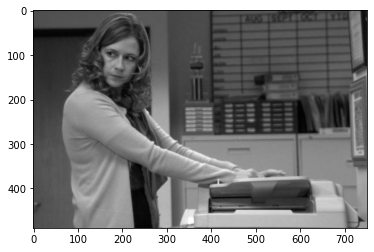

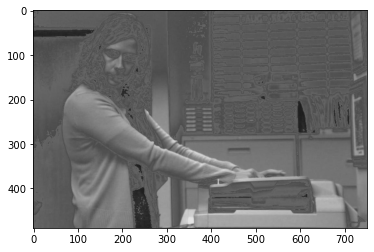

In [13]:
pam1 = cv2.imread('../imgs/pam1.png')

demn = [[0.0, 0.2, 2.0, 0.1],
        [0.2, 0.4, -1.0, 0.7],
        [0.4, 1.0, 1.0, -0.1]]

pam1_transformed = piecewiseLinTransform(pam1, demn)

plt.imshow(pam1)
plt.show()
plt.imshow(pam1_transformed)
plt.show()

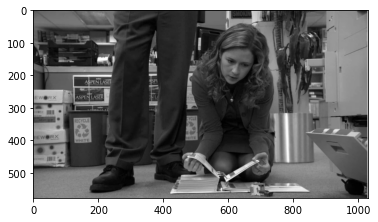

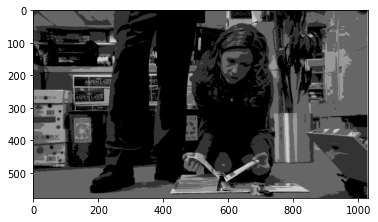

In [14]:
pam2 = cv2.imread('../imgs/pam2.png')

demn = [[0.0, 0.2, 0.0, 0.0],
        [0.2, 0.4, 0.0, 0.2],
        [0.4, 0.6, 0.0, 0.4],
        [0.6, 0.8, 0.0, 0.6],
        [0.8, 1.0, 0.0, 0.8]]

pam2_transformed = piecewiseLinTransform(pam2, demn)

plt.imshow(pam2)
plt.show()
plt.imshow(pam2_transformed)
plt.show()

In [15]:
def convert_to_grey(image1):

    blue_channel  = image1[:,:,0]
    green_channel = image1[:,:,1]
    red_channel   = image1[:,:,2]

    grey_img = 0.3*red_channel + 0.59*green_channel + 0.11*blue_channel
    grey_img = np.stack((grey_img,)*3, axis=-1)
    grey_img = grey_img.astype(int)

    return grey_img

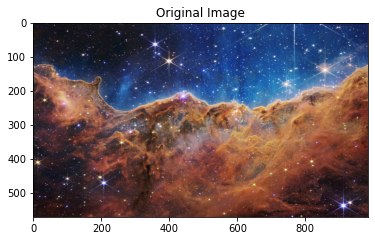

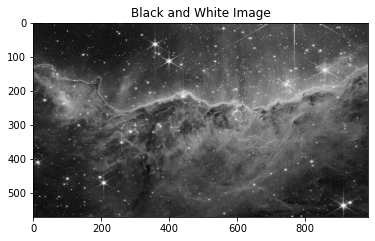

In [16]:
image1 = cv2.imread('../imgs/Q3.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.title("Original Image")
plt.show()

blue_channel  = image1[:,:,0]
green_channel = image1[:,:,1]
red_channel   = image1[:,:,2]

grey_img = convert_to_grey(image1)
plt.title("Black and White Image")
plt.imshow(grey_img)
plt.show()

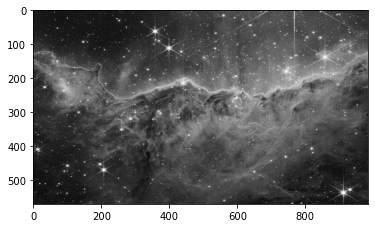

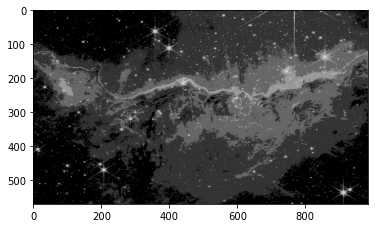

In [17]:
pam2 = grey_img

demn = [[0.0, 0.2, 0.0, 0.0],
        [0.2, 0.4, 0.0, 0.2],
        [0.4, 0.6, 0.0, 0.4],
        [0.6, 0.8, 0.0, 0.6],
        [0.8, 1.0, 0.0, 0.8]]

pam2_transformed = piecewiseLinTransform(pam2, demn)

plt.imshow(pam2)
plt.show()
plt.imshow(pam2_transformed)
plt.show()

**Question 5**

In [18]:
def bitSlice(im, k):
    im  = im[:,:,0]
    hoe = 1<<(k-1)
    im = im&hoe
    im = np.stack((im,)*3, axis=-1)
    return im

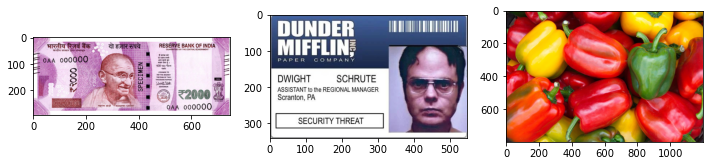

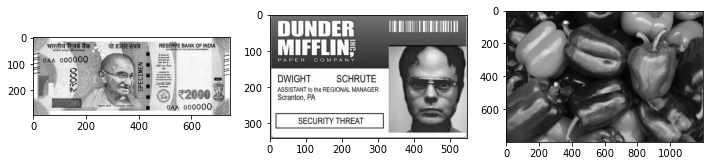

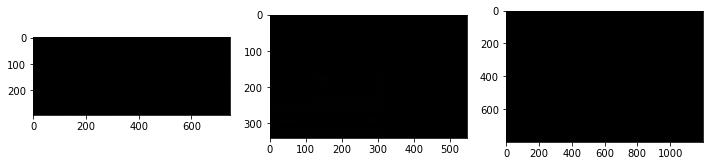

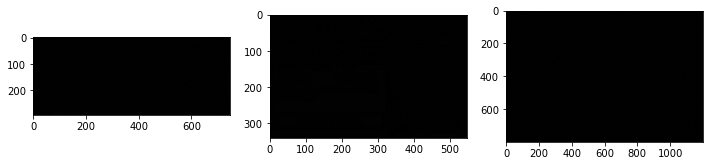

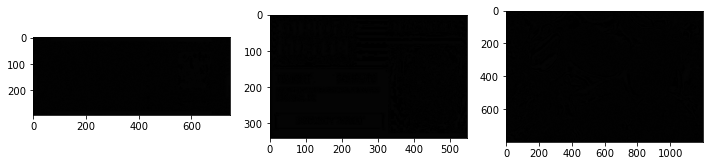

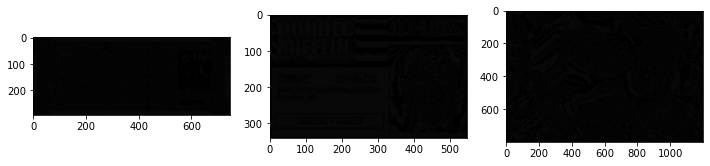

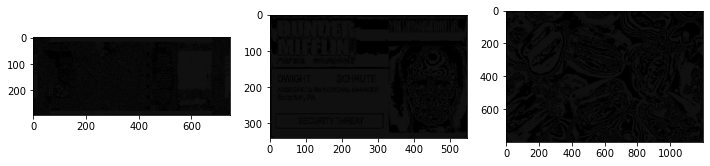

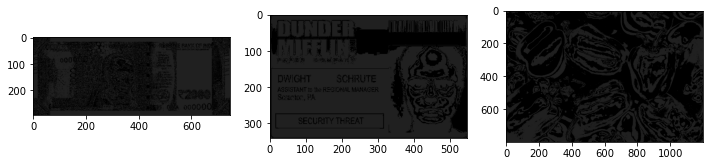

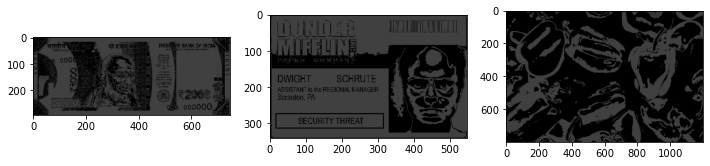

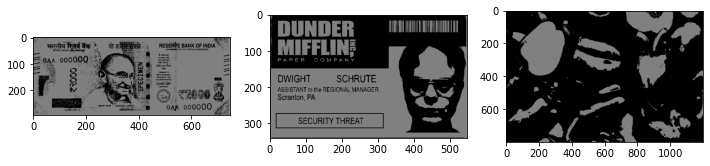

In [19]:
images_list = ['rupee.jpg', 'securityThreat.jpg', 'pepper.jpg']

plt.figure(figsize=(12, 6)) 
cnt=1
for image in images_list:
    img = cv2.imread('../imgs/'+image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, cnt)
    plt.imshow(img)
    cnt+=1
plt.show()

plt.figure(figsize=(12, 6)) 
cnt=1
for image in images_list:
    img = cv2.imread('../imgs/'+image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    grey_img = convert_to_grey(img)
    plt.subplot(1, 3, cnt)
    plt.imshow(grey_img)
    cnt+=1
plt.show()

for bit in range(1, 9):
    
    cnt=1
    plt.figure(figsize=(12, 6)) 
    for image in images_list:

        img = cv2.imread('../imgs/'+image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        grey_img = convert_to_grey(img)
        sliced_img = bitSlice(grey_img, bit)
        plt.subplot(1, 3, cnt)
        plt.imshow(sliced_img)
        cnt+=1

    plt.show()

In [20]:
def imgBitQuantizer(im, k):
    return im >> (8-k)

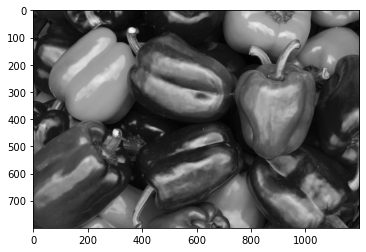

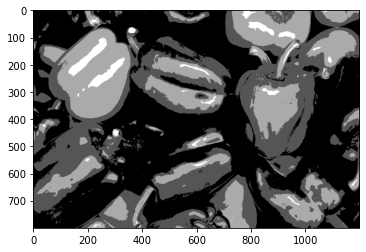

In [21]:
final_bits = 6

img = cv2.imread('../imgs/pepper.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(img)
grey_img = grey_img[:,:,0]
plt.imshow(grey_img,cmap = 'gray')
plt.show()

quantised_imgx = imgBitQuantizer(grey_img, 2)
plt.imshow(quantised_imgx,cmap = 'gray')
plt.show()

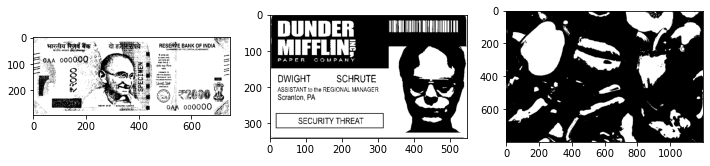

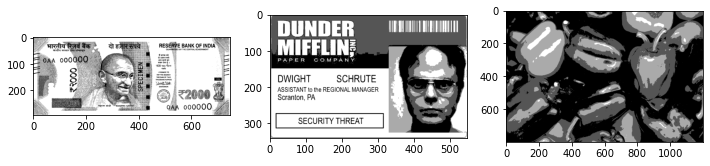

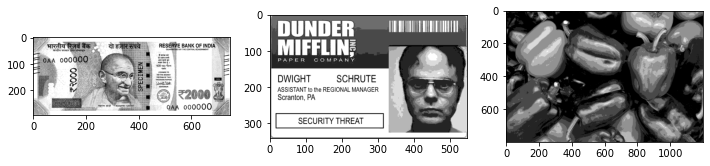

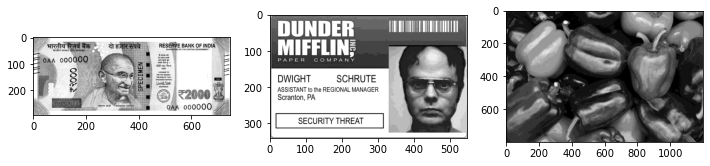

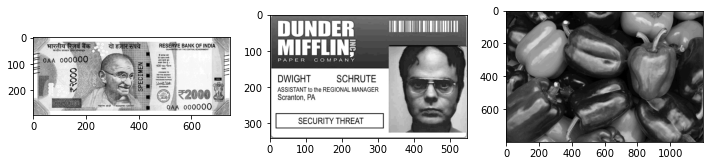

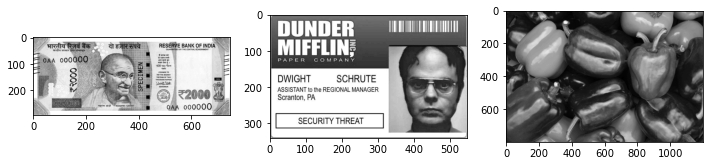

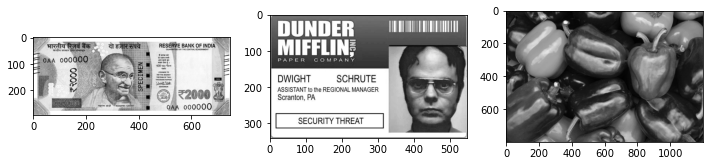

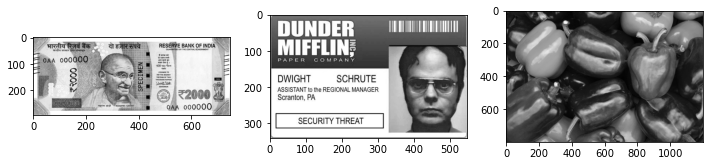

In [22]:
images_list = ['rupee.jpg', 'securityThreat.jpg', 'pepper.jpg']

for bit in range(1, 9):
    
    cnt=1
    plt.figure(figsize=(12, 6)) 
    for image in images_list:

        img = cv2.imread('../imgs/'+image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        grey_img = convert_to_grey(img)
        grey_img = grey_img[:,:,0]
        sliced_img = imgBitQuantizer(grey_img, bit)
        plt.subplot(1, 3, cnt)
        plt.imshow(sliced_img,cmap = 'gray')
        cnt+=1

    plt.show()

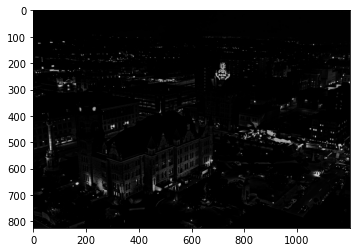

In [23]:
img = cv2.imread('../imgs/scrantonAreal.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = img[:,:,0]

plt.imshow(grey_img,cmap = 'gray')
plt.show()

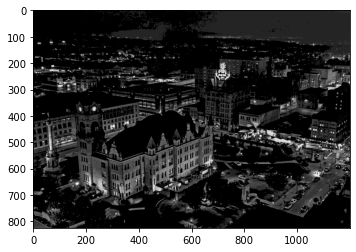

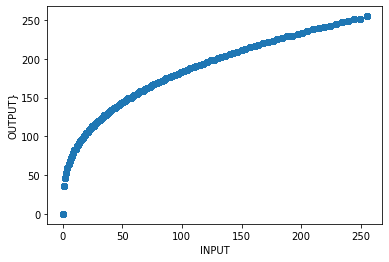

In [24]:
def powerLawTransform(im, gamma):
    y = im**gamma
    return (y/max(y.flatten())*255).astype(int)

hoe = powerLawTransform(grey_img, 0.35)
plt.imshow(hoe,cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

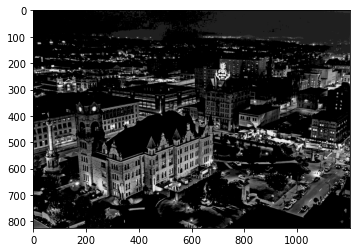

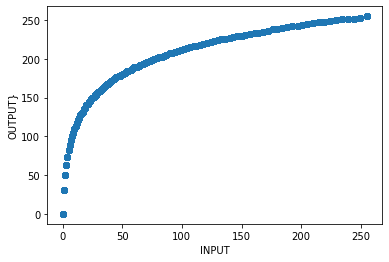

In [25]:
def hehe(im):
    y = np.log(1+im.astype(float))
    return (y/max(y.flatten())*255).astype(int)

hoe = hehe(grey_img)
plt.imshow(hoe,cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

In [26]:
img = cv2.imread('../imgs/scrantonAreal.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = img[:,:,0]
unique, counts = np.unique(grey_img, return_counts=True)
a = dict(zip(unique, counts))
a[0]+a[1]

708336

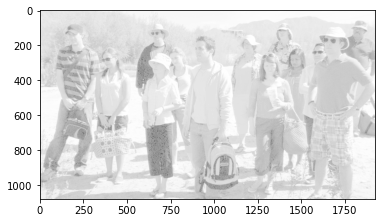

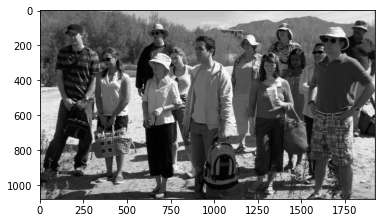

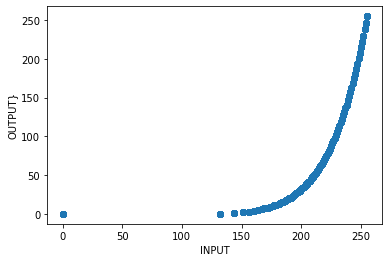

In [27]:
img = cv2.imread('../imgs/tripGrpPhoto.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = img[:,:,0]

plt.imshow(grey_img,cmap = 'gray')
plt.show()

hoe = powerLawTransform(grey_img, 8.5)
plt.imshow(hoe, cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

In [28]:
img = cv2.imread('/home/tusharc31/Desktop/foo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(img)
grey_img = img[:,:,0]

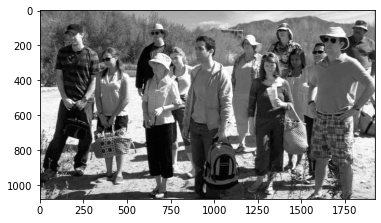

In [29]:
plt.imshow(grey_img,cmap = 'gray')
plt.show()